# Goals
Memprediksi berapa menit seseorang akan mendengarkan episode podcast berdasarkan data yang tersedia.

# Data Quality Check
- Q1: Apakah ada features yang data type-nya tidak sesuai?
- Q2: Adakah duplicate, missing values atau outliers? Bagaimana mengatasi hal-hal tersebut?
- Q3: Apakah terdapat distribusi yang tidak masuk akal?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#untuk mengatur agar columns nya tidak ke hidden
pd.set_option('display.max_columns', None)

sns.set_context('notebook')
sns.set_style('whitegrid')
#sns.set_palette('Spectral')
sns.set_palette('colorblind')

import warnings
warnings.filterwarnings('ignore')

# 2. LOAD DATA
data_train = pd.read_csv('train.csv')  # sesuaikan path jika diperlukan
data_test = pd.read_csv('test.csv')

data_train.shape, data_test.shape



((750000, 12), (250000, 11))

In [29]:
data_train.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031


In [3]:
data_test.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment
0,750000,Educational Nuggets,Episode 73,78.96,Education,38.11,Saturday,Evening,53.33,1.0,Neutral
1,750001,Sound Waves,Episode 23,27.87,Music,71.29,Sunday,Morning,NaN,0.0,Neutral
2,750002,Joke Junction,Episode 11,69.10,Comedy,67.89,Friday,Evening,97.51,0.0,Positive
3,750003,Comedy Corner,Episode 73,115.39,Comedy,23.40,Sunday,Morning,51.75,2.0,Positive
4,750004,Life Lessons,Episode 50,72.32,Lifestyle,58.10,Wednesday,Morning,11.30,2.0,Neutral


## Apakah ada features yang data type-nya tidak sesuai?

In [30]:
# EDA singkat
data_train.info()
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           750000 non-null  int64  
 1   Podcast_Name                 750000 non-null  object 
 2   Episode_Title                750000 non-null  object 
 3   Episode_Length_minutes       662907 non-null  float64
 4   Genre                        750000 non-null  object 
 5   Host_Popularity_percentage   750000 non-null  float64
 6   Publication_Day              750000 non-null  object 
 7   Publication_Time             750000 non-null  object 
 8   Guest_Popularity_percentage  603970 non-null  float64
 9   Number_of_Ads                749999 non-null  float64
 10  Episode_Sentiment            750000 non-null  object 
 11  Listening_Time_minutes       750000 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 68.7+ MB


## Kesimpulan
Di dataset **data_train**,ada 750000 data yang terdiri dari 12 columns,dan untuk **data_test**,ada 250000 data yang terdiri dari 11 kkolo,.

Disini untuk datatype nya sudah sesuai jadi tidak harus merubah nya,dan untuk nama kolom nya juga tidak ada yang aneh atau typo.

Jadi kesimpulan nya,di data quality ini sudah bagus.

## Adakah duplicate, missing values atau outliers? Bagaimana mengatasi hal-hal tersebut?

### Duplicates

In [5]:
data_train.duplicated().sum()

0

In [6]:
data_test.duplicated().sum()

0

Tidak ada data duplikat di dataset ini.

### Missing Values

In [7]:
# CEK MISSING VALUE
data_train.isna().sum().sort_values(ascending=False)

Guest_Popularity_percentage    146030
Episode_Length_minutes          87093
Number_of_Ads                       1
id                                  0
Podcast_Name                        0
Episode_Title                       0
Genre                               0
Host_Popularity_percentage          0
Publication_Day                     0
Publication_Time                    0
Episode_Sentiment                   0
Listening_Time_minutes              0
dtype: int64

In [8]:
data_test.isna().sum().sort_values(ascending=False)

Guest_Popularity_percentage    48832
Episode_Length_minutes         28736
id                                 0
Podcast_Name                       0
Episode_Title                      0
Genre                              0
Host_Popularity_percentage         0
Publication_Day                    0
Publication_Time                   0
Number_of_Ads                      0
Episode_Sentiment                  0
dtype: int64

Disini ada missing values di 3 features atau kolom,untuk di dataset **data_train**,yaitu ada di kolom ```Episode_Length_minutes```,```Guest_Popularity_percentage```,```Number_of_Ads```.
Sedangkan untuk di **data_test**,hanya ada di kolom ```Episode_Length_minutes```,dan```Guest_Popularity_percentage```

Untuk jumlah data yang kosong nya tidak terlalu parah,jadi bisa di atasi dengan mean/median.


<Axes: xlabel='Episode_Length_minutes'>

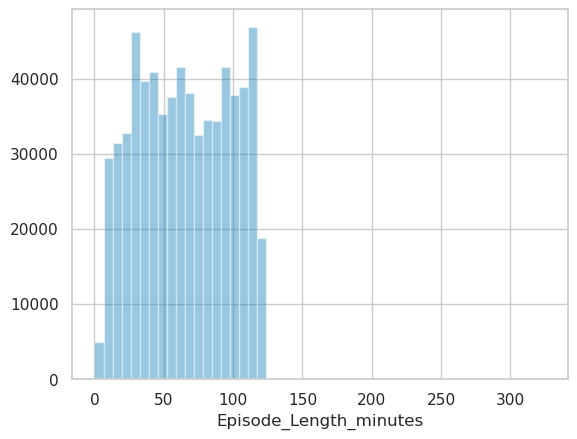

In [2]:
sns.distplot(data_train['Episode_Length_minutes'], kde=False, hist=True)

<Axes: xlabel='Guest_Popularity_percentage'>

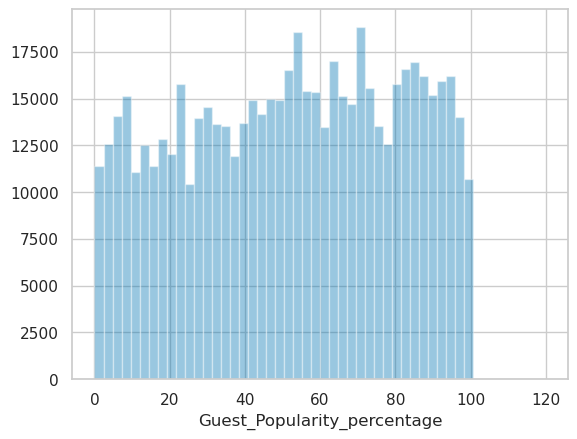

In [3]:
sns.distplot(data_train['Guest_Popularity_percentage'], kde=False, hist=True)

<Axes: xlabel='Number_of_Ads'>

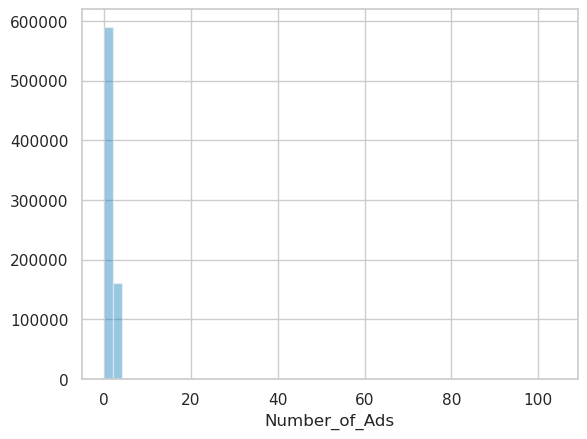

In [4]:
sns.distplot(data_train['Number_of_Ads'], kde=False, hist=True)

**atau dengan boxplot**

<Axes: >

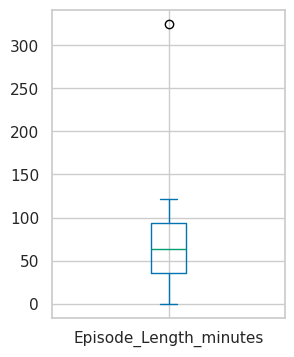

In [5]:
data_train['Episode_Length_minutes'].plot(kind='box', figsize=(3,4))

<Axes: >

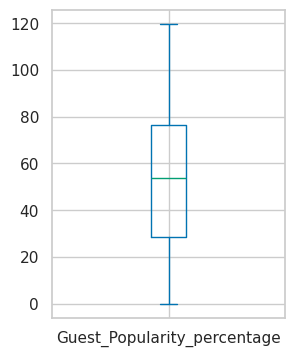

In [6]:
data_train['Guest_Popularity_percentage'].plot(kind='box', figsize=(3,4))

<Axes: >

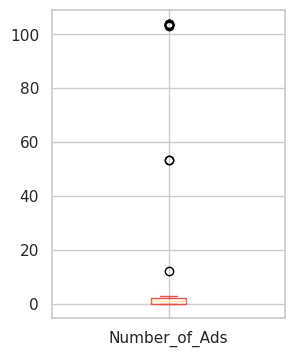

In [14]:
data_train['Number_of_Ads'].plot(kind='box', figsize=(3,4))

#### Imputasi atau mengisi nilai Missing values 

Untuk missing values nya akan di isi dengan median karena untuk 3 features ini memliki datatype yang sama yaitu float atau numeric.,dan juga ketika kita lihat distribunya,terdapat outliers yang sangat jauh

>**Kenapa median?**
>
>Karena median lebih tahan terhadap outliers atau data yang tidak masuk akal.

In [15]:
# Hitung median dari data train
guest_pop_median = data_train['Guest_Popularity_percentage'].median()
episode_len_median = data_train['Episode_Length_minutes'].median()
ads_median = data_train['Number_of_Ads'].median()

# Imputasi di data train
data_train['Guest_Popularity_percentage'].fillna(guest_pop_median, inplace=True)
data_train['Episode_Length_minutes'].fillna(episode_len_median, inplace=True)
data_train['Number_of_Ads'].fillna(ads_median, inplace=True)

# Imputasi di data test dengan median dari train
data_test['Guest_Popularity_percentage'].fillna(guest_pop_median, inplace=True)
data_test['Episode_Length_minutes'].fillna(episode_len_median, inplace=True)
data_test['Number_of_Ads'].fillna(ads_median, inplace=True)


In [16]:
data_test.isna().sum().sort_values(ascending=False)

id                             0
Podcast_Name                   0
Episode_Title                  0
Episode_Length_minutes         0
Genre                          0
Host_Popularity_percentage     0
Publication_Day                0
Publication_Time               0
Guest_Popularity_percentage    0
Number_of_Ads                  0
Episode_Sentiment              0
dtype: int64

In [17]:
data_train.isna().sum().sort_values(ascending=False)

id                             0
Podcast_Name                   0
Episode_Title                  0
Episode_Length_minutes         0
Genre                          0
Host_Popularity_percentage     0
Publication_Day                0
Publication_Time               0
Guest_Popularity_percentage    0
Number_of_Ads                  0
Episode_Sentiment              0
Listening_Time_minutes         0
dtype: int64

Sekarang sudah tidak ada missing values di dataset ini.

#### Kesimpulan
Jadi Untuk menangani missing values pada kolom ```Episode_Length_minutes```, ```Guest_Popularity_percentage```, dan ```Number_of_Ads```, saya memilih menggunakan imputasi dengan nilai median karena:
 - Ketiga kolom memiliki tipe data numerik (float).
 - Distribusi datanya tidak normal dan mengandung outlier ekstrem.
 - Penggunaan median lebih robust terhadap outlier dibandingkan mean, sehingga lebih aman dalam menjaga kualitas data.

### Outliers

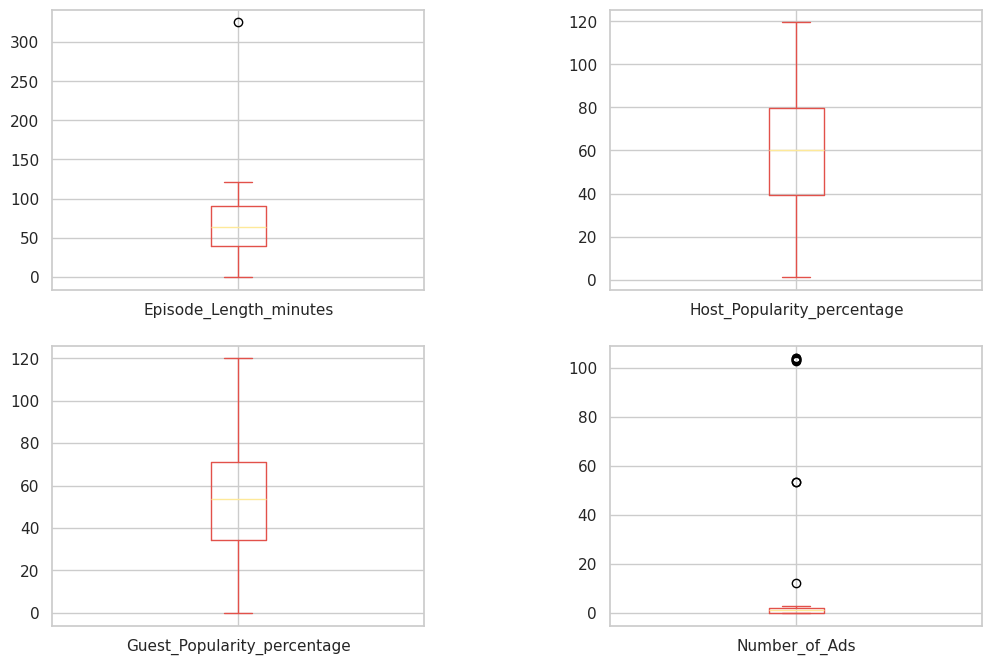

In [18]:
# Ambil semua kolom numerik
df_to_plot = data_train.select_dtypes(include=['float', 'int'])

# Drop kolom yang tidak relevan untuk boxplot
df_to_plot.drop(columns=['id', 'Listening_Time_minutes'], inplace=True)  # 'Listening_Time_minutes' adalah target

# Plot boxplot per kolom
df_to_plot.plot(subplots=True, layout=(2,2), kind='box', figsize=(12, 8))
plt.subplots_adjust(wspace=0.5)


### Kesimpulan
Tidak ada outliers atau data yang tidak masuk akal,jadi tidak merubah apapun

## Apakah terdapat distribusi yang tidak masuk akal?
Melihat Distribusi data secara histogram

Sebelum mem-plot histogram, kita perlu mengetahui terlebih dahulu **kolom-kolom numerik** yang akan digunakan untuk visualisasi.


In [31]:
# DISTRIBUSI KATEGORIK
categorical_cols = data_train.select_dtypes(include='object').columns.tolist()
for col in categorical_cols:
    print(f"{col} - Unique values: {data_train[col].nunique()}")
    print(data_train[col].value_counts(normalize=True).head(), "\n")


Podcast_Name - Unique values: 48
Podcast_Name
Tech Talks       0.030463
Sports Weekly    0.026737
Funny Folks      0.026180
Tech Trends      0.026065
Fitness First    0.025984
Name: proportion, dtype: float64 

Episode_Title - Unique values: 100
Episode_Title
Episode 71    0.014020
Episode 62    0.013831
Episode 31    0.013723
Episode 61    0.013321
Episode 69    0.013152
Name: proportion, dtype: float64 

Genre - Unique values: 10
Genre
Sports        0.116808
Technology    0.115008
True Crime    0.113412
Lifestyle     0.109948
Comedy        0.108604
Name: proportion, dtype: float64 

Publication_Day - Unique values: 7
Publication_Day
Sunday       0.154595
Monday       0.149284
Friday       0.144316
Wednesday    0.143848
Thursday     0.139147
Name: proportion, dtype: float64 

Publication_Time - Unique values: 4
Publication_Time
Night        0.262465
Evening      0.261037
Afternoon    0.239280
Morning      0.237217
Name: proportion, dtype: float64 

Episode_Sentiment - Unique values: 3

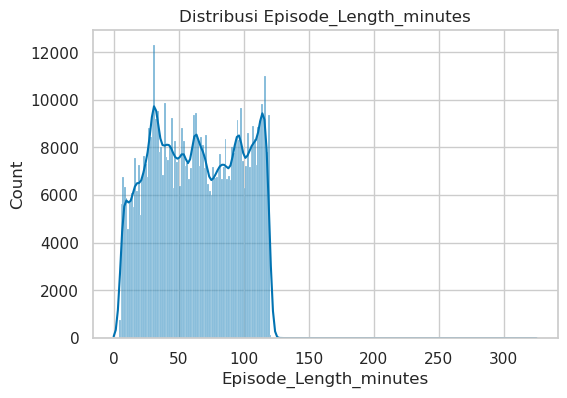

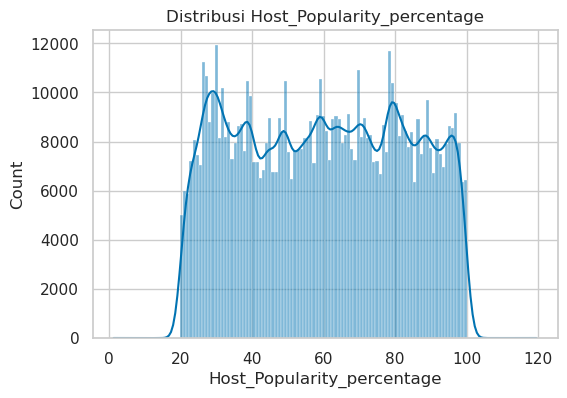

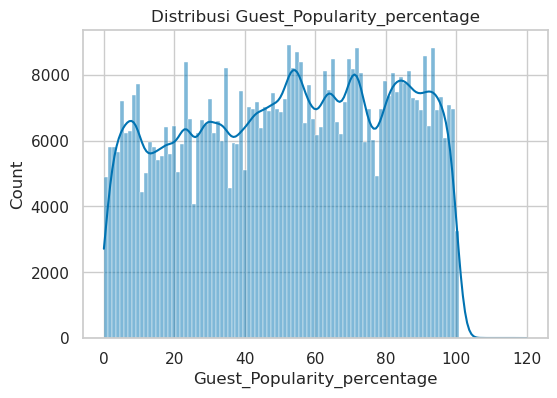

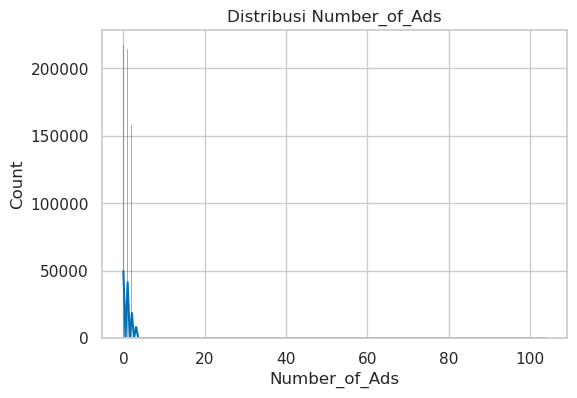

In [7]:
# DISTRIBUSI NUMERIK
numeric_cols = data_train.select_dtypes(include=['int64', 'float64']).drop(columns=['id', 'Listening_Time_minutes']).columns

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data_train[col], kde=True)
    plt.title(f'Distribusi {col}')
    plt.show()


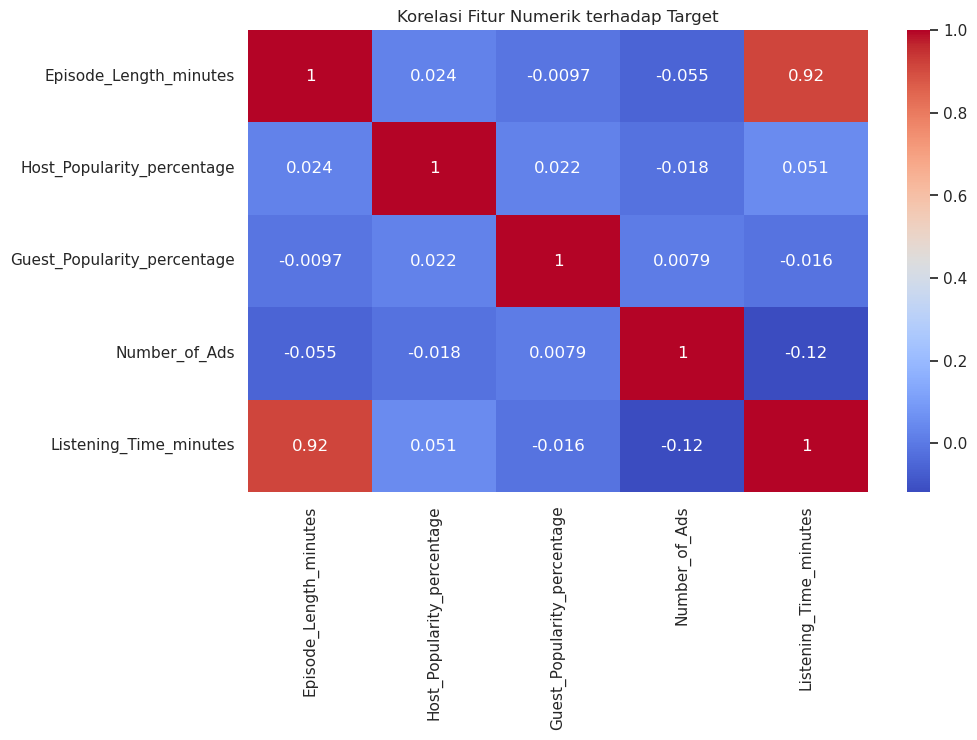

In [8]:
# KORELASI DENGAN TARGET
corr = data_train[numeric_cols.tolist() + ['Listening_Time_minutes']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Korelasi Fitur Numerik terhadap Target')
plt.show()


### 🔍 Penjelasan Korelasi Fitur terhadap `Listening_Time_minutes`

| Fitur                         | Korelasi | Arti & Insight                                                                 |
|------------------------------|----------|---------------------------------------------------------------------------------|
| `Episode_Length_minutes`     | **0.92** | 💥 **Sangat kuat!** Makin panjang durasi episode, makin tinggi waktu mendengarkan. |
| `Host_Popularity_percentage` | 0.051    | 🔹 Lemah. Popularitas host hampir tidak pengaruhi waktu dengar.                |
| `Guest_Popularity_percentage`| -0.016   | 🔹 Sangat lemah & negatif sedikit. Tidak signifikan.                           |
| `Number_of_Ads`              | -0.12    | ⚠️ Negatif rendah. Bisa jadi makin banyak iklan, makin cepat pendengar keluar. |

---

### 🎯 Kesimpulan buat modeling:

- **Fitur paling penting sejauh ini:** `Episode_Length_minutes`
- Fitur seperti `Guest_Popularity_percentage` dan `Host_Popularity_percentage` **tidak terlalu berguna secara korelasi**, tapi bisa saja tetap relevan jika dikombinasikan dengan fitur lain (non-linear model kayak Random Forest bisa nangkep ini).
- `Number_of_Ads` bisa diuji lagi, karena korelasinya kecil tapi **negatif** → mungkin berguna kalau dipadukan dengan durasi episode.

In [19]:
numeric = df_to_plot.columns

In [20]:
numeric

Index(['Episode_Length_minutes', 'Host_Popularity_percentage',
       'Guest_Popularity_percentage', 'Number_of_Ads'],
      dtype='object')

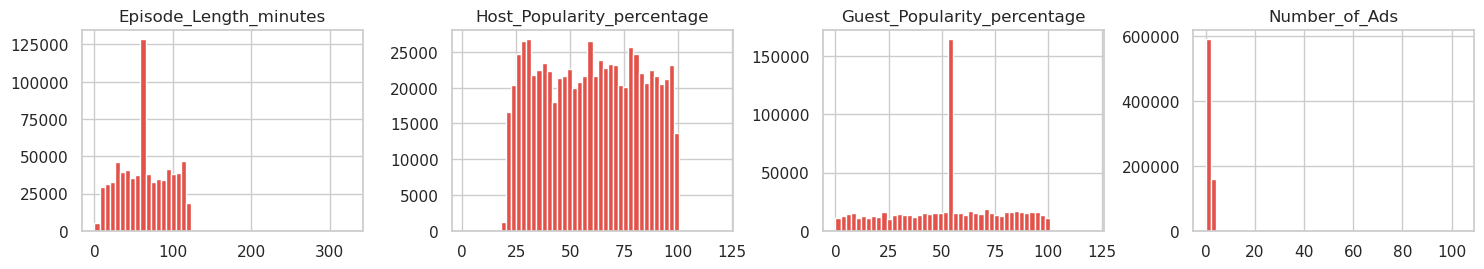

In [21]:
fig = plt.figure(figsize=(15,10))    # Membuat figure besar dengan ukuran 15x10
ax = plt.gca()                       # Mendapatkan current axis (sumbu aktif)

data_train.hist(                             # Plot histogram untuk banyak kolom sekaligus
    bins=50,                         # Jumlah pembagian (bin) histogram
    ax=ax,                           # Sumbu yang dipakai (tapi ini sebenernya gak perlu di sini)
    layout=(4,4),                    # Menata plot dalam grid 4x4 (16 kolom)
    column=numeric                  # Hanya kolom numerik yang diplot
)

plt.tight_layout()                  # Supaya layout antar plot nggak saling tumpang tindih
plt.show()                          # Tampilkan semua plot


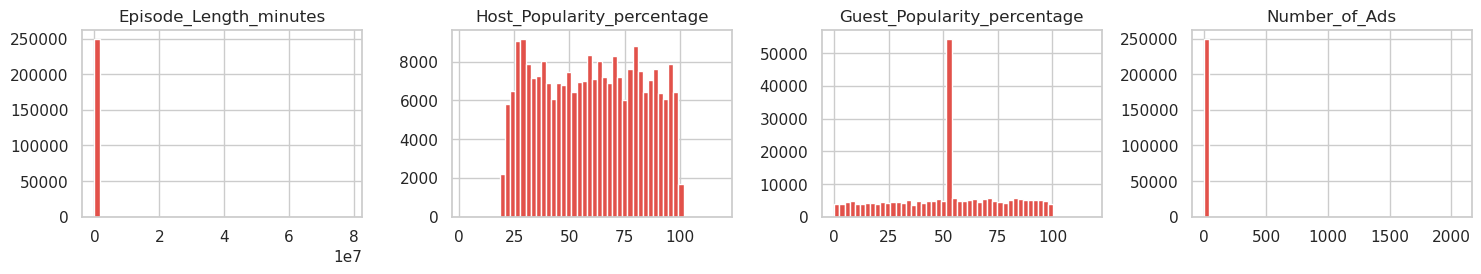

In [22]:
fig = plt.figure(figsize=(15,10))    # Membuat figure besar dengan ukuran 15x10
ax = plt.gca()                       # Mendapatkan current axis (sumbu aktif)

data_test.hist(                             # Plot histogram untuk banyak kolom sekaligus
    bins=50,                         # Jumlah pembagian (bin) histogram
    ax=ax,                           # Sumbu yang dipakai (tapi ini sebenernya gak perlu di sini)
    layout=(4,4),                    # Menata plot dalam grid 4x4 (16 kolom)
    column=numeric                  # Hanya kolom numerik yang diplot
)

plt.tight_layout()                  # Supaya layout antar plot nggak saling tumpang tindih
plt.show()                          # Tampilkan semua plot


#### Kesimpulan
Kurang lebih secara distribusi itu juga aman,jadi kesimpulan dari apakah ada distribusi yang tidak masuk akal adalah tidak ada.

# Data Insight

Untuk Data Insight ini kita akan melihat semua insight dari semua kolom yang ada,dan kita akan melihat apakah ada suatu patern dari kolom-kolom ini dengan variabel target kita,yaitu ```Listening_Time_minutes```.

In [23]:
data_train.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,63.84,True Crime,74.81,Thursday,Night,53.58,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031


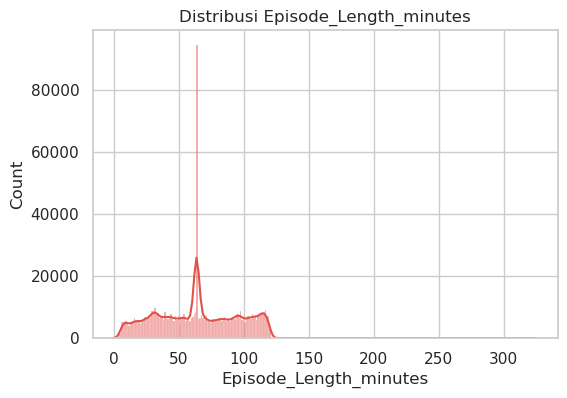

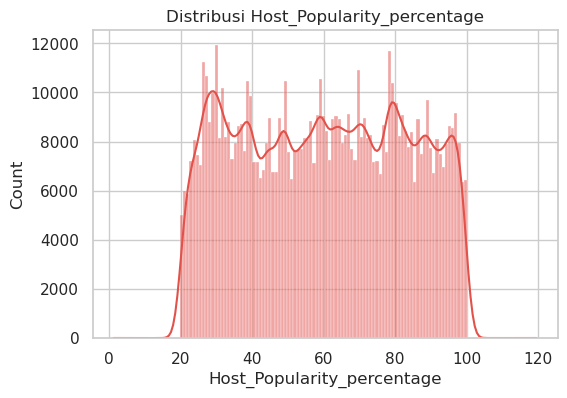

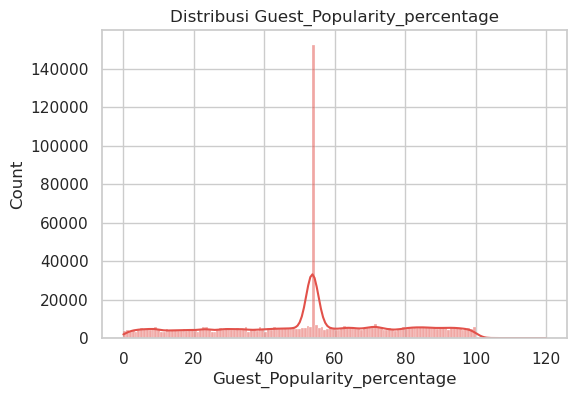

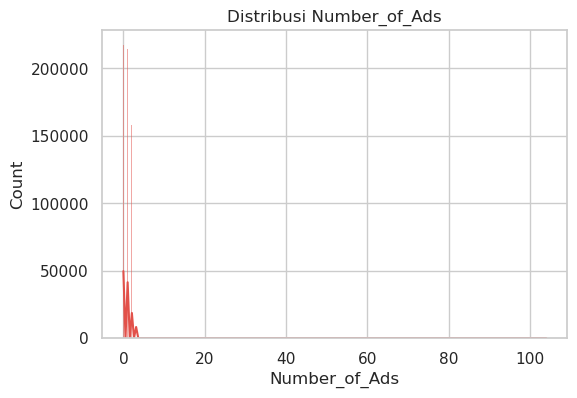

In [27]:
# DISTRIBUSI NUMERIK
numeric_cols = data_train.select_dtypes(include=['int64', 'float64']).drop(columns=['id', 'Listening_Time_minutes']).columns

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data_train[col], kde=True)
    plt.title(f'Distribusi {col}')
    plt.show()
